In [8]:
%pylab inline
from skimage import data,color,filters,morphology,feature,draw,transform,util

Populating the interactive namespace from numpy and matplotlib


/usr/local/lib/python3.4/dist-packages/IPython/core/magics/pylab.py:160: UserWarning: pylab import has clobbered these variables: ['draw', 'e']
`%matplotlib` prevents importing * from pylab and numpy
  "\n`%matplotlib` prevents importing * from pylab and numpy"


## Filtrowanie szumu

Zrób zdjęcie zawierające szum typu salt/pepper i zastosuj na nim filtry uśredniający, gaussowski i medianowy z modułu *skimage.filters*.

/usr/local/lib/python3.4/dist-packages/skimage/util/dtype.py:122: UserWarning: Possible precision loss when converting from float64 to uint8
  .format(dtypeobj_in, dtypeobj_out))


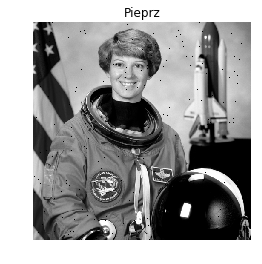

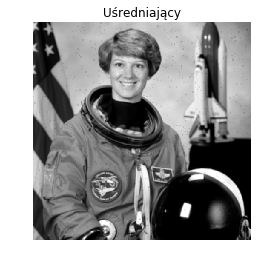

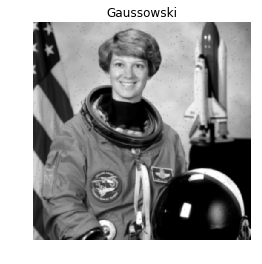

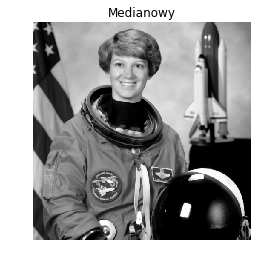

In [9]:
i = data.astronaut()
i = color.rgb2gray(i)

N = 1000
x = random.randint(0, i.shape[0], N)
y = random.randint(0, i.shape[1], N)
i[x,y] = 0

imshow(i,cmap=cm.gray)
_=axis('off')
_=title('Pieprz')

#Filtr uśredniający
j = filters.rank.mean(i, morphology.rectangle(3,3))
figure()
imshow(j,cmap=cm.gray)
_=axis('off')
_=title('Uśredniający')

#Filtr Gaussowski
j = filters.gaussian(i,sigma=1.2)
figure()
imshow(j,cmap=cm.gray)
_=axis('off')
_=title('Gaussowski')

#Filtr Medianowy
j = filters.median(i, morphology.rectangle(3,3))
figure()
imshow(j,cmap=cm.gray)
_=axis('off')
_=title('Medianowy')



## Dylacja, erozja, zamknięcie i otwarcie

Dokonaj operacji dylacji, erozji, otwarcia i zamknięcia na tym samym zdjęciu co powyżej, w filtrze medianowym. Jakie operacje się nadają do jakiego rodzaju szumu?

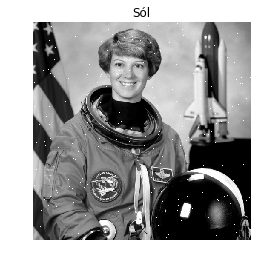

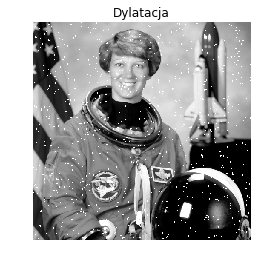

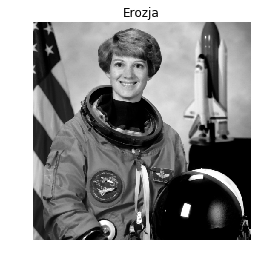

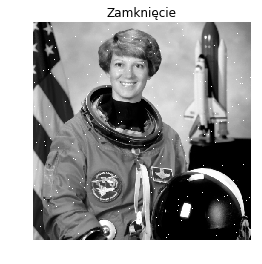

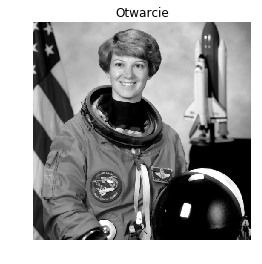

In [10]:
#################################################################################################

i = data.astronaut()
i = color.rgb2gray(i)

N = 1000
x = random.randint(0, i.shape[0], N)
y = random.randint(0, i.shape[1], N)
i[x,y] = 1

imshow(i,cmap=cm.gray)
_=axis('off')
_=title('Sól')

#Dylatacja
j = morphology.dilation(i)
figure()
imshow(j,cmap=cm.gray)
_=axis('off')
_=title('Dylatacja')

#Erozja
j = morphology.erosion(i)
figure()
imshow(j,cmap=cm.gray)
_=axis('off')
_=title('Erozja')

#Zamknięcie
j = morphology.closing(i)
figure()
imshow(j,cmap=cm.gray)
_=axis('off')
_=title('Zamknięcie')

#Otwarcie
j = morphology.opening(i)
figure()
imshow(j,cmap=cm.gray)
_=axis('off')
_=title('Otwarcie')

#################################################################################################


## Detekcja elementów morfologicznych - transformata Hough'a

Po dokonaniu binaryzacji zdjęć, możemy zaczać szukać pozytecznych informacji w rastrze. Istnieje na to wiele metod, ale tutaj omówimy pewną ciekawą metodę znaną jako transformatę Hough'a.

Użyj transforamty Hough'a żeby odnaleźć linie występujące w krawędziach zdjęcia *data.camera* (użyj transformaty Canny'ego do otrzymania krawędzi). Do tranformacji zdjęcia do przestrzeni Hough'a użyj metody *skimage.transform.hough_line*. Do wyboru największych przecięć można użyć *skimage.transform.hough_line_peaks*. Wygodniej jednak będzie zastosować *skimage.transform.probabilistic_hough_line* do policzenia współrzędnych linii na obrazie. Użyj parametrów *threshold=10*, *line_length=5* oraz *line_gap=3*. Pokesperymentuyj z nimi żeby znaleźć inne rozwiązania.

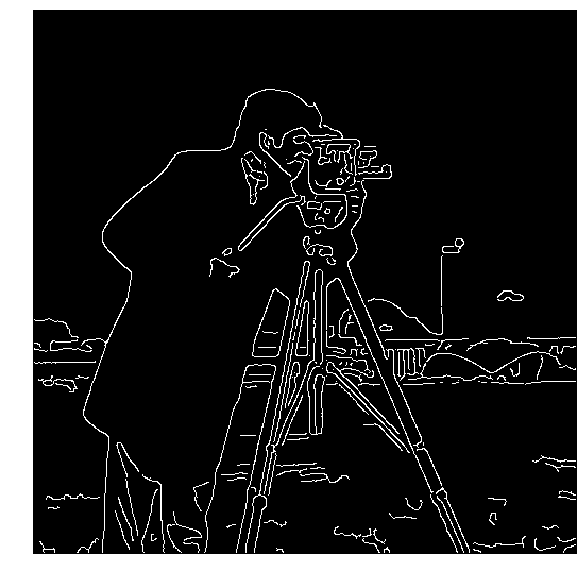

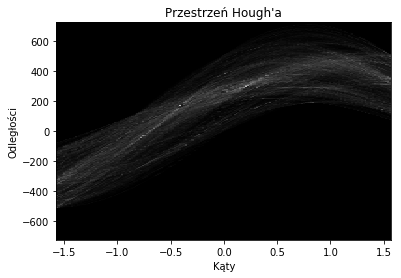

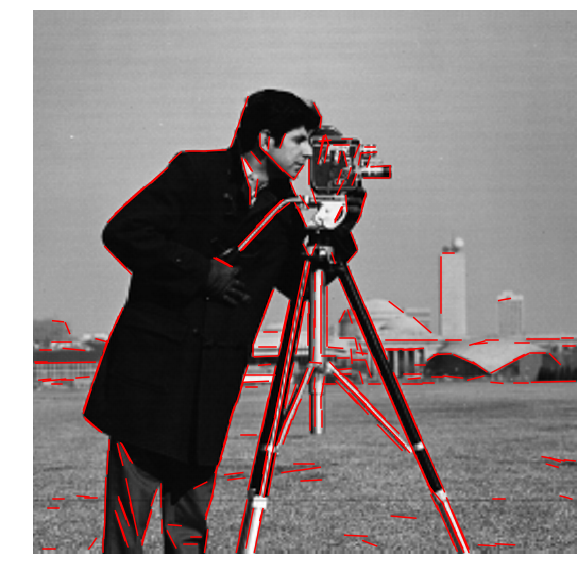

In [11]:

i = data.camera()

e = feature.canny(i, sigma=2)

figure(figsize=(10,10))
imshow(e,cmap=cm.gray)
_=axis('off')

h,w,d = transform.hough_line(e)

figure()
pcolormesh(w,d,h,cmap=cm.gray)
_=xlabel(u"Kąty")
_=ylabel(u"Odległości")
_=title(u"Przestrzeń Hough'a")

#Lista linii
lines = transform.probabilistic_hough_line(e, line_length=10, line_gap=3, threshold=10)

figure(figsize=(10,10))
imshow(i, cmap=cm.gray)
_=axis('off')

#Zmieniamy listę linii na macierz Numpy
lines = array(lines)
for l in lines:
    #Podajemy najpierw iksy potem igreki
    plot(l.T[0], l.T[1], 'r')

In [ ]:
from skimage import data, color
from skimage.transform import hough_circle
from skimage.feature import peak_local_max, canny
from skimage.draw import circle_perimeter
from skimage.util import img_as_ubyte

# Praca domowa

Użyj transformaty Hougha do detekcji kół i elips (metoda *hough_circle*) na zdjęciu *data.coins*.

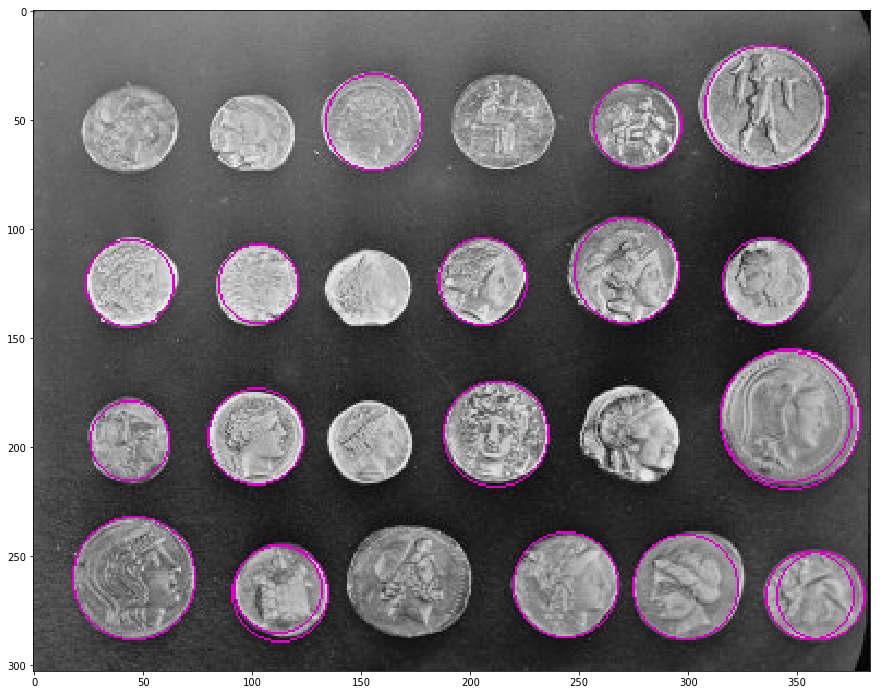

In [79]:
image = data.coins()
edges = canny(image, sigma=3)

radius = np.arange(10, 35, 2)
hough = hough_circle(edges, radius)

_, ox, oy, r = transform.hough_circle_peaks(hough, hough_radii, total_num_peaks=20)

image = color.gray2rgb(image)
for x, y, radius in zip(ox, oy, r):
    cx, cy = circle_perimeter(x, y, radius)
    image[cy, cx] = (220, 0, 200)

figure(figsize=(15,15))
imshow(image, cmap=plt.cm.gray)


In [62]:
hough_circle?